# Hou-Stock!

깃허브에서 영감을 얻어 사용자가 직접 데이터를 만들어가는 것을 만들고 싶었습니다.

1. 이용자가 직접 데이터를 입력한다.

2. 전체 데이터에 대한 정보를 제공한다.


나아가 실제로 상업화까지 생각을 해봤습니다.

1. 전체 데이터에 대한 정보를 제공할 때마다 짧은 광고영상

2. 재구매 시기에 맞춰 적절한 상품 광고

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas import DataFrame, Series
from datetime import timedelta

In [2]:
#새로운 입력 데이터에서 오늘부터 구매일까지의 경과일수
def expirationTime():
    targetDateInt=(int)(buyday)
    tyear=(int)(targetDateInt/10000)
    tmonth=(int)(targetDateInt%10000/100)
    tday=(int)(targetDateInt%100)
    targetDate=dt.date(year=tyear,month=tmonth,day=tday)
    return (todayDate-targetDate).days

In [3]:
#전체 자료 경과일수에 대한 동기화 // 지금은 데이터가 작아서 상관없지만 커질경우..문제
def expirationTime2(itemNum):
    targetDateInt=(int)(data.iloc[itemNum,5])
    tyear=(int)(targetDateInt/10000)
    tmonth=(int)(targetDateInt%10000/100)
    tday=(int)(targetDateInt%100)
    targetDate=dt.date(year=tyear,month=tmonth,day=tday)
    return (todayDate-targetDate).days

In [4]:
#중복 값 제거 후 목록
def func(what):
    lst=data[what]
    x=1
    d={}
    while x<len(lst):
        k=lst[x]
        d[k]=d.get(k,0)+1
        x+=1
    keylst=list(d.keys())
    print ('다음 중 원하는 것을 입력하거나, 새로 입력하시오', keylst)

In [5]:
#데이터 로드
data=pd.read_csv("DataSet.csv",sep=',',index_col=0)

#데이터 확인
data

,ID,위치,대분류,소분류,가격,구입시기,구입 후 경과기간
0,철수네,주방,김치,배추김치,5000,20180601,25
1,철수네,주방,김치,총각김치,3000,20180302,116
2,철수네,욕실,세제,총각김치,3000,20180302,116
3,영희네,주방,김치,배추김치,8000,20180515,42
4,철수네,베란다,세제,표백제,15000,20180101,176
5,맹구네,욕실,바디/헤어,샴푸,12000,20180501,56
6,효상이네,베란다,의류,양말,2000,20180411,76


In [6]:
#오늘의 날짜
todayDate=dt.date.today()
todayDate

datetime.date(2018, 6, 26)

In [7]:
#전체 index 갯수
indexRange=data.index.size

In [8]:
lst=[]
for i in range(indexRange):
    lst.append(expirationTime2(i))

In [9]:
data["구입 후 경과기간"]=lst
data

,ID,위치,대분류,소분류,가격,구입시기,구입 후 경과기간
0,철수네,주방,김치,배추김치,5000,20180601,25
1,철수네,주방,김치,총각김치,3000,20180302,116
2,철수네,욕실,세제,총각김치,3000,20180302,116
3,영희네,주방,김치,배추김치,8000,20180515,42
4,철수네,베란다,세제,표백제,15000,20180101,176
5,맹구네,욕실,바디/헤어,샴푸,12000,20180501,56
6,효상이네,베란다,의류,양말,2000,20180411,76


In [10]:
#ID입력
print ("ID를 입력하시오.")
ID=input()

ID를 입력하시오.
정식이네


In [11]:
#장소입력
func("위치")
place=input()

다음 중 원하는 것을 입력하거나, 새로 입력하시오 ['주방', '욕실', '베란다']
주방


In [12]:
#대분류 중복 제거 후 보여주고 입력
func("대분류")
largeCategory=input()

다음 중 원하는 것을 입력하거나, 새로 입력하시오 ['김치', '세제', '바디/헤어', '의류']
한정식


In [13]:
#소분류 중복 제거 후 보여주고 입력
func("소분류")
smallCategory=input()

다음 중 원하는 것을 입력하거나, 새로 입력하시오 ['총각김치', '배추김치', '표백제', '샴푸', '양말']
햇반


In [14]:
#가격 입력
price=input()

1250


In [15]:
#구입시기 입력하도록 하기
print ("구입시기를 8자리로 입력하시오. 예)20180101")
buyday=int(input())
if buyday>21000000:
    print("날짜가 너무 큽니다. 다시 입력 하시오")
    buyday=int(input())
elif buyday<20000000:
    print("날짜가 너무 작습니다. 다시 입력 하시오")
    buyday=int(input())
elif expirationTime()<0:
    print("미래를 입력할 수 없습니다. 다시 입력 하시오")
    buyday=int(input())
else :
    print('입력하신 날짜는 %d 입니다.'%(buyday))

구입시기를 8자리로 입력하시오. 예)20180101
20180313
입력하신 날짜는 20180313 입니다.


In [16]:
#새로운 데이터 추가
newData=np.array([ID,place,largeCategory,smallCategory,price,buyday,expirationTime()])
newData

array(['정식이네', '주방', '한정식', '햇반', '1250', '20180313', '105'], dtype='<U8')

In [17]:
#데이터를 데이터 프레임으로 변환
newDataFix=DataFrame(newData.reshape(1,-1),columns=['ID','위치','대분류','소분류','가격','구입시기','구입 후 경과기간']).rename(index={0:indexRange})
newDataFix

,ID,위치,대분류,소분류,가격,구입시기,구입 후 경과기간
7,정식이네,주방,한정식,햇반,1250,20180313,105


In [18]:
#기존 데이터에 새로운 데이터 프레임 추가
sumDF=pd.concat([data,newDataFix])
sumDF

,ID,위치,대분류,소분류,가격,구입시기,구입 후 경과기간
0,철수네,주방,김치,배추김치,5000,20180601,25
1,철수네,주방,김치,총각김치,3000,20180302,116
2,철수네,욕실,세제,총각김치,3000,20180302,116
3,영희네,주방,김치,배추김치,8000,20180515,42
4,철수네,베란다,세제,표백제,15000,20180101,176
5,맹구네,욕실,바디/헤어,샴푸,12000,20180501,56
6,효상이네,베란다,의류,양말,2000,20180411,76
7,정식이네,주방,한정식,햇반,1250,20180313,105


In [19]:
#데이터 저장
sumDF.to_csv("DataSet.csv",sep=',')

In [20]:
#데이터 불러오기
data2=pd.read_csv("DataSet.csv",sep=',',index_col=0)
data2

,ID,위치,대분류,소분류,가격,구입시기,구입 후 경과기간
0,철수네,주방,김치,배추김치,5000,20180601,25
1,철수네,주방,김치,총각김치,3000,20180302,116
2,철수네,욕실,세제,총각김치,3000,20180302,116
3,영희네,주방,김치,배추김치,8000,20180515,42
4,철수네,베란다,세제,표백제,15000,20180101,176
5,맹구네,욕실,바디/헤어,샴푸,12000,20180501,56
6,효상이네,베란다,의류,양말,2000,20180411,76
7,정식이네,주방,한정식,햇반,1250,20180313,105


# 개선해야할 사항

### 소분류에 따른 재구매에 대한 것을 입력하면 재구매 구입시기에 맞춰서 기존 구입했던 제품의 소모기간을 산출

### 이 데이터를 DataFrame에 넣어서 그 기간에 대한 통계치 산출 후 DataFrame을 DB화 시킨다.

### Item에 대해서 개개인이 직접입력하는 방식인데, 온라인 쇼핑몰을 참고하여 틀을 정해놓고 선택하도록 하는것이 어떤지

### 이용자가 원하는 소분류의 평균을 구하는 임의의 방법

In [21]:
wantMean=input()

배추김치


In [22]:
data2[["가격","구입 후 경과기간"]].groupby(data2["소분류"]).mean().loc[wantMean]

가격           6500.0
구입 후 경과기간      33.5
Name: 배추김치, dtype: float64

In [23]:
#분석용 임의 데이터 불러오기
dataSet=pd.read_csv("DF.csv",sep=',',index_col=0)
dataSet

,ID,소분류,가격,평균 소비기간
0,철수네,배추김치,5000,38
1,철수네,배추김치,5500,33
2,철수네,배추김치,6000,30
3,철수네,배추김치,5300,32
4,영희네,배추김치,3800,22
5,영희네,배추김치,4400,28
6,영희네,배추김치,4100,28
7,영희네,배추김치,4900,30
8,영희네,배추김치,3500,39
9,철수네,배추김치,4800,32


In [24]:
dataS=dataSet.mean()
dataS

가격         4900.000000
평균 소비기간      32.823529
dtype: float64

In [25]:
pri=dataSet.groupby("ID").mean().astype(float)
pri

,가격,평균 소비기간
ID,,
영희네,4140.000000,29.40
철수네,5216.666667,34.25


In [26]:
pri.loc['평균']=dataS
pri

,가격,평균 소비기간
ID,,
영희네,4140.000000,29.400000
철수네,5216.666667,34.250000
평균,4900.000000,32.823529


In [27]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font',family='Malgun Gothic')

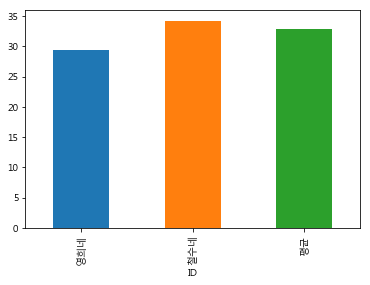

In [28]:
pri['평균 소비기간'].plot(kind='bar')

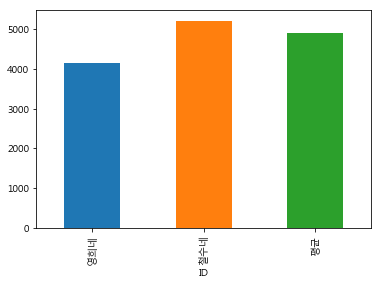

In [29]:
pri['가격'].plot(kind='bar')

# 개선해야할 사항

적절한 상품을 제공해주는 사업성을 갖고 싶었는데,
품질이나 맛 가격 어떤 초점에 맞춰서 고객에게 맞춤 상품을 제공할지에 대한 문제가 있다.

자유롭게 입력하다 보니 데이터가 지저분해질 수 있어서 이에 따른 대비가 필요하다.